# Schrödinger-Equation (in wave and phase form)

In [1]:
%run sps_test_suite.py

# perturbation wave

tEnd 0.3183098861837907


## phase-ho-upwind

Constructing muscl-upwind scheme scheme
Setting up fourier grid
filename  perturbation_wave_phase-ho-upwind
Number of frames: 50, time per frame (ms) = 6.366197723675813 and frames per second 10
Create animation with configuration:  {'dimension': 1, 'resolution': 64, 'domainSize': 1, 'usePeriodicBC': True, 'ghostBoundarySize': 3, 't0': 0, 'tEnd': 0.3183098861837907, 'dt': 0.0001, 'slowDown': 15.707963267948966, 'fps': 10, 'useAdaptiveTimestep': True, 'cfl': 1, 'maximumNumberOfTimesteps': 100000, 'timeOrder': 2, 'stencilOrder': 4, 'fluxLimiter': 'VANALBADA', 'gravity': 0, 'useCosmology': False, 'nThreads': 4, 'externalPotential': None, 'debug': False, 'outputTimestep': False, 'useHybrid': False, 'useAdaptiveSubregions': False, 'subregions': [], 'windowUpdateFrequency': 100, 'WindowSize': 0.5, 'mode': 0, 'enoOrder': 1, 'rhoOrder': 1, 'modifiedPQN': 3, 'xlim': [0, 1], 'densityYlim': [0.98, 1.02], 'phaseYlim': [-0.01, 0.01], 'useAdaptiveYlim': False, 'plotDensityLogarithm': True, 'plotPhas

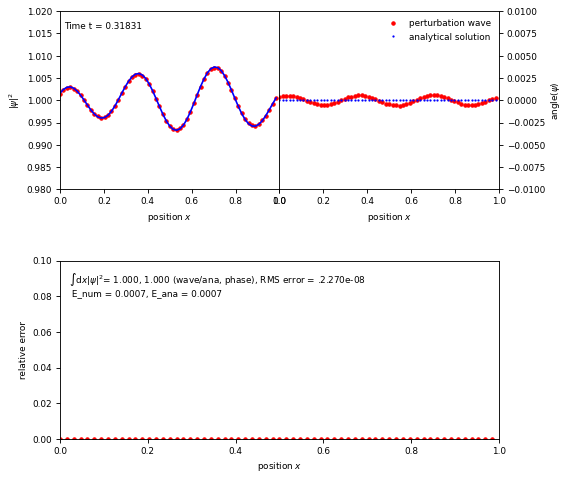

In [4]:
runTest(test_name="perturbation wave", scheme_name="phase-ho-upwind", createAnimation=True)

# soliton 2D

## phase-ho-upwind

Constructing muscl-upwind scheme scheme
Setting up fourier grid
Constructing spectral scheme scheme
Setting up fourier grid
Number of frames: 20, time per frame (ms) = 100.0 and frames per second 1
Create animation with configuration:  {'dimension': 2, 'resolution': 256, 'domainSize': 25, 'usePeriodicBC': True, 'ghostBoundarySize': 3, 't0': 0, 'tEnd': 2, 'dt': 0.0001, 'slowDown': 10, 'fps': 1, 'useAdaptiveTimestep': True, 'cfl': 1, 'maximumNumberOfTimesteps': 100000, 'timeOrder': 2, 'stencilOrder': 4, 'fluxLimiter': 'VANALBADA', 'gravity': 1, 'useCosmology': False, 'nThreads': 4, 'externalPotential': None, 'debug': False, 'outputTimestep': False, 'useHybrid': False, 'useAdaptiveSubregions': False, 'subregions': [], 'windowUpdateFrequency': 100, 'WindowSize': 0.5, 'mode': 0, 'enoOrder': 1, 'rhoOrder': 1, 'modifiedPQN': 3, 'xlim': [0, 1], 'densityYlim': [0, 1], 'phaseYlim': [-50, 50], 'useAdaptiveYlim': False, 'plotDensityLogarithm': True, 'plotPhaseMod2': False, 'dpi': 300, 'figsize': [

/media/xerox/INTENSO/fdm-hybrid-scheme/src/animation.py:524: UserWarning: Casting input data from float128 to float64 for imshow
  plt.savefig(f"plots/2d/{filename}.pdf", bbox_inches="tight")
/media/xerox/INTENSO/fdm-hybrid-scheme/src/animation.py:524: UserWarning: Casting input data from float128 to float64 for imshow
  plt.savefig(f"plots/2d/{filename}.pdf", bbox_inches="tight")
/media/xerox/INTENSO/fdm-hybrid-scheme/src/animation.py:860: UserWarning: Casting input data from float128 to float64 for imshow
  plt.savefig(f"plots/{dim}d/{filename}/{i}.jpg", bbox_inches="tight", dpi=config["dpi"])
/media/xerox/INTENSO/fdm-hybrid-scheme/src/animation.py:875: UserWarning: Casting input data from float128 to float64 for imshow
  anim.save(f"gifs/{dim}d/{filename}.gif", writer=writergif)
/media/xerox/INTENSO/fdm-hybrid-scheme/src/animation.py:524: UserWarning: Casting input data from float128 to float64 for imshow
  plt.savefig(f"plots/2d/{filename}.pdf", bbox_inches="tight")
/media/xerox/IN

# soliton 2D

## hybrid

Constructing hybrid scheme scheme
Setting up fourier grid
Enabling multiprocessing via pool with 2 processes
Set up nD binary tree with N = 256
Create solver of type:  SolverType.NOSOLVER
Create solver of type:  SolverType.NOSOLVER
Create solver of type:  SolverType.NOSOLVER
Create solver of type:  SolverType.NOSOLVER
Create solver of type:  SolverType.NOSOLVER
Create solver of type:  SolverType.NOSOLVER
Create solver of type:  SolverType.PHASESOLVER
Create solver of type:  SolverType.PHASESOLVER
Create solver of type:  SolverType.PHASESOLVER
Create solver of type:  SolverType.PHASESOLVER
Constructing spectral scheme scheme
Setting up fourier grid
Number of frames: 20, time per frame (ms) = 100.0 and frames per second 1
Create animation with configuration:  {'dimension': 2, 'resolution': 256, 'domainSize': 25, 'usePeriodicBC': True, 'ghostBoundarySize': 3, 't0': 0, 'tEnd': 2, 'dt': 0.0001, 'slowDown': 10, 'fps': 1, 'useAdaptiveTimestep': True, 'cfl': 1, 'maximumNumberOfTimesteps': 1000

/media/xerox/INTENSO/fdm-hybrid-scheme/src/animation.py:524: UserWarning: Casting input data from float128 to float64 for imshow
  plt.savefig(f"plots/2d/{filename}.pdf", bbox_inches="tight")
/media/xerox/INTENSO/fdm-hybrid-scheme/src/animation.py:524: UserWarning: Casting input data from float128 to float64 for imshow
  plt.savefig(f"plots/2d/{filename}.pdf", bbox_inches="tight")
/media/xerox/INTENSO/fdm-hybrid-scheme/src/animation.py:860: UserWarning: Casting input data from float128 to float64 for imshow
  plt.savefig(f"plots/{dim}d/{filename}/{i}.jpg", bbox_inches="tight", dpi=config["dpi"])
/media/xerox/INTENSO/fdm-hybrid-scheme/src/animation.py:875: UserWarning: Casting input data from float128 to float64 for imshow
  anim.save(f"gifs/{dim}d/{filename}.gif", writer=writergif)


t = 0.1 dt = 0.0011920928955078125 min density = 0.8773867535369493 max density = 1.1115951896048277
t = 0.10119209289550782 dt = 0.0011920928955078125 min density = 0.8773546880603252 max density = 1.1116617121108152
t = 0.10238418579101563 dt = 0.0011920928955078125 min density = 0.8773221399664745 max density = 1.1117290655248093
t = 0.10357627868652344 dt = 0.0011920928955078125 min density = 0.8772891064293274 max density = 1.1117972512510872
t = 0.10476837158203126 dt = 0.0011920928955078125 min density = 0.877255584505087 max density = 1.1118662707728422
t = 0.10596046447753907 dt = 0.0011920928955078125 min density = 0.8772215710820382 max density = 1.1119361255909763
t = 0.10715255737304688 dt = 0.0011920928955078125 min density = 0.8771870628642621 max density = 1.1120068171651916
t = 0.10834465026855469 dt = 0.0011920928955078125 min density = 0.8771520563932766 max density = 1.1120783468743172
t = 0.1095367431640625 dt = 0.0011920928955078125 min density = 0.877116548107473

/media/xerox/INTENSO/fdm-hybrid-scheme/src/animation.py:524: UserWarning: Casting input data from float128 to float64 for imshow
  plt.savefig(f"plots/2d/{filename}.pdf", bbox_inches="tight")
/media/xerox/INTENSO/fdm-hybrid-scheme/src/animation.py:860: UserWarning: Casting input data from float128 to float64 for imshow
  plt.savefig(f"plots/{dim}d/{filename}/{i}.jpg", bbox_inches="tight", dpi=config["dpi"])
/media/xerox/INTENSO/fdm-hybrid-scheme/src/animation.py:875: UserWarning: Casting input data from float128 to float64 for imshow
  anim.save(f"gifs/{dim}d/{filename}.gif", writer=writergif)


t = 0.2 dt = 0.0011920928955078125 min density = 0.8727055360725818 max density = 1.1239985010417037
t = 0.20119209289550782 dt = 0.0011920928955078125 min density = 0.8726212714884369 max density = 1.1242229984216145
t = 0.20238418579101564 dt = 0.0011920928955078125 min density = 0.8725362346482451 max density = 1.1244490722736769
t = 0.20357627868652345 dt = 0.0011920928955078125 min density = 0.8724504218763274 max density = 1.124676727852441
t = 0.20476837158203126 dt = 0.0011920928955078125 min density = 0.8723638296674221 max density = 1.1249059702864992
t = 0.20596046447753907 dt = 0.0011920928955078125 min density = 0.8722764546253584 max density = 1.125136804587908
t = 0.20715255737304689 dt = 0.0011920928955078125 min density = 0.8721882933508681 max density = 1.1253692357883445
t = 0.2083446502685547 dt = 0.0011920928955078125 min density = 0.8720993423163224 max density = 1.1256032687850932
t = 0.2095367431640625 dt = 0.0011920928955078125 min density = 0.8720095977849768 

/media/xerox/INTENSO/fdm-hybrid-scheme/src/animation.py:524: UserWarning: Casting input data from float128 to float64 for imshow
  plt.savefig(f"plots/2d/{filename}.pdf", bbox_inches="tight")
/media/xerox/INTENSO/fdm-hybrid-scheme/src/animation.py:860: UserWarning: Casting input data from float128 to float64 for imshow
  plt.savefig(f"plots/{dim}d/{filename}/{i}.jpg", bbox_inches="tight", dpi=config["dpi"])
/media/xerox/INTENSO/fdm-hybrid-scheme/src/animation.py:875: UserWarning: Casting input data from float128 to float64 for imshow
  anim.save(f"gifs/{dim}d/{filename}.gif", writer=writergif)


t = 0.30000000000000004 dt = 0.0011920928955078125 min density = 0.8626291197233023 max density = 1.1488500088557008
t = 0.30119209289550786 dt = 0.0011920928955078125 min density = 0.8624493179708312 max density = 1.1492277447941615
t = 0.30238418579101567 dt = 0.0011920928955078125 min density = 0.8622684603136683 max density = 1.1496076256323364
t = 0.3035762786865235 dt = 0.0011920928955078125 min density = 0.8620865411255617 max density = 1.1499896578165867
t = 0.3047683715820313 dt = 0.0011920928955078125 min density = 0.861903553131965 max density = 1.150373848475904
t = 0.3059604644775391 dt = 0.0011920928955078125 min density = 0.8617194888076076 max density = 1.1507602062387021
t = 0.3071525573730469 dt = 0.0011920928955078125 min density = 0.861534341948206 max density = 1.1511487416996866
t = 0.30834465026855473 dt = 0.0011920928955078125 min density = 0.861348108959094 max density = 1.151539467350432
t = 0.30953674316406254 dt = 0.0011920928955078125 min density = 0.861160

/media/xerox/INTENSO/fdm-hybrid-scheme/src/animation.py:524: UserWarning: Casting input data from float128 to float64 for imshow
  plt.savefig(f"plots/2d/{filename}.pdf", bbox_inches="tight")
/media/xerox/INTENSO/fdm-hybrid-scheme/src/animation.py:860: UserWarning: Casting input data from float128 to float64 for imshow
  plt.savefig(f"plots/{dim}d/{filename}/{i}.jpg", bbox_inches="tight", dpi=config["dpi"])
/media/xerox/INTENSO/fdm-hybrid-scheme/src/animation.py:875: UserWarning: Casting input data from float128 to float64 for imshow
  anim.save(f"gifs/{dim}d/{filename}.gif", writer=writergif)


t = 0.4 dt = 0.0011920928955078125 min density = 0.8436063714644393 max density = 1.1894892276539892
t = 0.40119209289550783 dt = 0.0011920928955078125 min density = 0.843328634900924 max density = 1.1901095222928457
t = 0.40238418579101565 dt = 0.0011920928955078125 min density = 0.8430496017264549 max density = 1.1907330578495647
t = 0.40357627868652346 dt = 0.0011920928955078125 min density = 0.8427692718004336 max density = 1.1913598472065599
t = 0.40476837158203127 dt = 0.0011920928955078125 min density = 0.8424876492052341 max density = 1.1919899033200632
t = 0.4059604644775391 dt = 0.0011920928955078125 min density = 0.8422047399497551 max density = 1.1926232406875992
t = 0.4071525573730469 dt = 0.0011920928955078125 min density = 0.8419205494209198 max density = 1.193259876464485
t = 0.4083446502685547 dt = 0.0011920928955078125 min density = 0.8416350805529652 max density = 1.1938998307604864
t = 0.4095367431640625 dt = 0.0011920928955078125 min density = 0.8413483331295772 ma

/media/xerox/INTENSO/fdm-hybrid-scheme/src/animation.py:524: UserWarning: Casting input data from float128 to float64 for imshow
  plt.savefig(f"plots/2d/{filename}.pdf", bbox_inches="tight")
/media/xerox/INTENSO/fdm-hybrid-scheme/src/animation.py:860: UserWarning: Casting input data from float128 to float64 for imshow
  plt.savefig(f"plots/{dim}d/{filename}/{i}.jpg", bbox_inches="tight", dpi=config["dpi"])
/media/xerox/INTENSO/fdm-hybrid-scheme/src/animation.py:875: UserWarning: Casting input data from float128 to float64 for imshow
  anim.save(f"gifs/{dim}d/{filename}.gif", writer=writergif)


t = 0.5 dt = 0.0011920928955078125 min density = 0.815278564382896 max density = 1.2545679428494247
t = 0.5011920928955078 dt = 0.0011920928955078125 min density = 0.8148686556541971 max density = 1.2555288606354942
t = 0.5023841857910156 dt = 0.0011920928955078125 min density = 0.8144572599424819 max density = 1.2564948663600826
t = 0.5035762786865234 dt = 0.0011920928955078125 min density = 0.8140443916780519 max density = 1.2574659702776452
t = 0.5047683715820312 dt = 0.0011920928955078125 min density = 0.8136300664006013 max density = 1.258442187635887
t = 0.5059604644775391 dt = 0.0011920928955078125 min density = 0.8132142962137273 max density = 1.2594235433566974
t = 0.5071525573730469 dt = 0.0011920928955078125 min density = 0.8127970858525005 max density = 1.2604100739735016
t = 0.5083446502685547 dt = 0.0011920928955078125 min density = 0.8123784308766909 max density = 1.261401825990393
t = 0.5095367431640625 dt = 0.0011920928955078125 min density = 0.8119583189068901 max den

/media/xerox/INTENSO/fdm-hybrid-scheme/src/animation.py:524: UserWarning: Casting input data from float128 to float64 for imshow
  plt.savefig(f"plots/2d/{filename}.pdf", bbox_inches="tight")
/media/xerox/INTENSO/fdm-hybrid-scheme/src/animation.py:860: UserWarning: Casting input data from float128 to float64 for imshow
  plt.savefig(f"plots/{dim}d/{filename}/{i}.jpg", bbox_inches="tight", dpi=config["dpi"])
/media/xerox/INTENSO/fdm-hybrid-scheme/src/animation.py:875: UserWarning: Casting input data from float128 to float64 for imshow
  anim.save(f"gifs/{dim}d/{filename}.gif", writer=writergif)


t = 0.6 dt = 0.0011920928955078125 min density = 0.7716957016675596 max density = 1.3561011830493597
t = 0.6011920928955078 dt = 0.0011920928955078125 min density = 0.7710186251621328 max density = 1.3576148439287719
t = 0.6023841857910156 dt = 0.0011920928955078125 min density = 0.7703397830607225 max density = 1.3591370420107465
t = 0.6035762786865234 dt = 0.0011920928955078125 min density = 0.769659172053056 max density = 1.3606678045191267
t = 0.6047683715820312 dt = 0.0011920928955078125 min density = 0.7689767972400107 max density = 1.3622071498880348
t = 0.605960464477539 dt = 0.0011920928955078125 min density = 0.7682926689158525 max density = 1.363755102049402
t = 0.6071525573730469 dt = 0.0011920928955078125 min density = 0.767606797744915 max density = 1.3653117039390756
t = 0.6083446502685547 dt = 0.0011920928955078125 min density = 0.7669191901004432 max density = 1.366877025152546
t = 0.6095367431640625 dt = 0.0011920928955078125 min density = 0.7662298451901224 max densi

/media/xerox/INTENSO/fdm-hybrid-scheme/src/animation.py:524: UserWarning: Casting input data from float128 to float64 for imshow
  plt.savefig(f"plots/2d/{filename}.pdf", bbox_inches="tight")
/media/xerox/INTENSO/fdm-hybrid-scheme/src/animation.py:860: UserWarning: Casting input data from float128 to float64 for imshow
  plt.savefig(f"plots/{dim}d/{filename}/{i}.jpg", bbox_inches="tight", dpi=config["dpi"])
/media/xerox/INTENSO/fdm-hybrid-scheme/src/animation.py:875: UserWarning: Casting input data from float128 to float64 for imshow
  anim.save(f"gifs/{dim}d/{filename}.gif", writer=writergif)


t = 0.7 dt = 0.0011920928955078125 min density = 0.7087403970002613 max density = 1.5189318036563448
t = 0.7011920928955078 dt = 0.0011920928955078125 min density = 0.7078328271113518 max density = 1.5214044987066506
t = 0.7023841857910156 dt = 0.0011920928955078125 min density = 0.7069232968299604 max density = 1.523892701530117
t = 0.7035762786865234 dt = 0.0011920928955078125 min density = 0.7060117919168729 max density = 1.526396526920697
t = 0.7047683715820312 dt = 0.0011920928955078125 min density = 0.7050983050392797 max density = 1.5289160055599782
t = 0.705960464477539 dt = 0.0011920928955078125 min density = 0.7041828390836009 max density = 1.5314511132047945
t = 0.7071525573730468 dt = 0.0011920928955078125 min density = 0.7032654076048633 max density = 1.5340018185839122
t = 0.7083446502685546 dt = 0.0011920928955078125 min density = 0.7023460322228826 max density = 1.5365681338935673
t = 0.7095367431640625 dt = 0.0011920928955078125 min density = 0.7014247377269229 max den

/media/xerox/INTENSO/fdm-hybrid-scheme/src/animation.py:524: UserWarning: Casting input data from float128 to float64 for imshow
  plt.savefig(f"plots/2d/{filename}.pdf", bbox_inches="tight")
/media/xerox/INTENSO/fdm-hybrid-scheme/src/animation.py:860: UserWarning: Casting input data from float128 to float64 for imshow
  plt.savefig(f"plots/{dim}d/{filename}/{i}.jpg", bbox_inches="tight", dpi=config["dpi"])
/media/xerox/INTENSO/fdm-hybrid-scheme/src/animation.py:875: UserWarning: Casting input data from float128 to float64 for imshow
  anim.save(f"gifs/{dim}d/{filename}.gif", writer=writergif)


t = 0.7999999999999999 dt = 0.0011920928955078125 min density = 0.6256949622184222 max density = 1.7926936350548466
t = 0.8011920928955077 dt = 0.0011920928955078125 min density = 0.6246308773087383 max density = 1.7969700648580842
t = 0.8023841857910156 dt = 0.0011920928955078125 min density = 0.6235653057734358 max density = 1.8012764919734092
t = 0.8035762786865234 dt = 0.0011920928955078125 min density = 0.6224982368591526 max density = 1.8056131320514934
t = 0.8047683715820312 dt = 0.0011920928955078125 min density = 0.6214296632823707 max density = 1.8099801765953183
t = 0.805960464477539 dt = 0.0011920928955078125 min density = 0.6203595855056807 max density = 1.8143778239646142
t = 0.8071525573730468 dt = 0.0011920928955078125 min density = 0.6192880138342107 max density = 1.8188063108887924
t = 0.8083446502685546 dt = 0.0011920928955078125 min density = 0.618214967865004 max density = 1.823265931850866
t = 0.8095367431640624 dt = 0.0011920928955078125 min density = 0.617140473

/media/xerox/INTENSO/fdm-hybrid-scheme/src/animation.py:524: UserWarning: Casting input data from float128 to float64 for imshow
  plt.savefig(f"plots/2d/{filename}.pdf", bbox_inches="tight")
/media/xerox/INTENSO/fdm-hybrid-scheme/src/animation.py:860: UserWarning: Casting input data from float128 to float64 for imshow
  plt.savefig(f"plots/{dim}d/{filename}/{i}.jpg", bbox_inches="tight", dpi=config["dpi"])
/media/xerox/INTENSO/fdm-hybrid-scheme/src/animation.py:875: UserWarning: Casting input data from float128 to float64 for imshow
  anim.save(f"gifs/{dim}d/{filename}.gif", writer=writergif)


t = 0.8999999999999999 dt = 0.0011920928955078125 min density = 0.5319720783996215 max density = 2.2930609142313503
t = 0.9011920928955077 dt = 0.0011920928955078125 min density = 0.5308035786421955 max density = 2.3014408214558597
t = 0.9023841857910155 dt = 0.0011920928955078125 min density = 0.5296344422811425 max density = 2.309893812325931
t = 0.9035762786865233 dt = 0.0011920928955078125 min density = 0.5284646724556437 max density = 2.3184205950140613
t = 0.9047683715820312 dt = 0.0011920928955078125 min density = 0.5272942688432183 max density = 2.327021652948205
t = 0.905960464477539 dt = 0.0011920928955078125 min density = 0.5261232314596346 max density = 2.3356973289023135
t = 0.9071525573730468 dt = 0.0011920928955078125 min density = 0.5249515640902133 max density = 2.344447965322237
t = 0.9083446502685546 dt = 0.0011920928955078125 min density = 0.5237792763813071 max density = 2.3532740562519923
t = 0.9095367431640624 dt = 0.0011920928955078125 min density = 0.5226063840

/media/xerox/INTENSO/fdm-hybrid-scheme/src/animation.py:524: UserWarning: Casting input data from float128 to float64 for imshow
  plt.savefig(f"plots/2d/{filename}.pdf", bbox_inches="tight")
/media/xerox/INTENSO/fdm-hybrid-scheme/src/animation.py:860: UserWarning: Casting input data from float128 to float64 for imshow
  plt.savefig(f"plots/{dim}d/{filename}/{i}.jpg", bbox_inches="tight", dpi=config["dpi"])
/media/xerox/INTENSO/fdm-hybrid-scheme/src/animation.py:875: UserWarning: Casting input data from float128 to float64 for imshow
  anim.save(f"gifs/{dim}d/{filename}.gif", writer=writergif)


t = 0.9999999999999999 dt = 0.0011920928955078125 min density = 0.43280061786247936 max density = 3.347271510371571
t = 1.0011920928955078 dt = 0.0011920928955078125 min density = 0.43161938234111197 max density = 3.3657717822227737
t = 1.0023841857910156 dt = 0.0011920928955078125 min density = 0.4304385622767796 max density = 3.3844645412179353
t = 1.0035762786865234 dt = 0.0011920928955078125 min density = 0.42925820977843965 max density = 3.4033520229039533
t = 1.0047683715820312 dt = 0.0011920928955078125 min density = 0.428078370285403 max density = 3.422436273462085
t = 1.005960464477539 dt = 0.0011920928955078125 min density = 0.4268990754714273 max density = 3.4417192144498396
t = 1.0071525573730469 dt = 0.0011920928955078125 min density = 0.42572033971406364 max density = 3.4612027794651135
t = 1.0083446502685547 dt = 0.0011920928955078125 min density = 0.42454216092176145 max density = 3.4808890768952025
t = 1.0095367431640625 dt = 0.0011920928955078125 min density = 0.42336

/media/xerox/INTENSO/fdm-hybrid-scheme/src/animation.py:524: UserWarning: Casting input data from float128 to float64 for imshow
  plt.savefig(f"plots/2d/{filename}.pdf", bbox_inches="tight")
/media/xerox/INTENSO/fdm-hybrid-scheme/src/animation.py:860: UserWarning: Casting input data from float128 to float64 for imshow
  plt.savefig(f"plots/{dim}d/{filename}/{i}.jpg", bbox_inches="tight", dpi=config["dpi"])
/media/xerox/INTENSO/fdm-hybrid-scheme/src/animation.py:875: UserWarning: Casting input data from float128 to float64 for imshow
  anim.save(f"gifs/{dim}d/{filename}.gif", writer=writergif)


t = 1.1 dt = 0.0011920928955078125 min density = 0.3360437710310763 max density = 5.935734378051256
t = 1.101192092895508 dt = 0.0011920928955078125 min density = 0.33493364732504105 max density = 5.987395086719417
t = 1.1023841857910157 dt = 0.0011920928955078125 min density = 0.333825016255759 max density = 6.039725366133527
t = 1.1035762786865235 dt = 0.0011920928955078125 min density = 0.33271793192086196 max density = 6.092732530278312
t = 1.1047683715820313 dt = 0.0011920928955078125 min density = 0.3316124429811242 max density = 6.146426730876612
t = 1.1059604644775392 dt = 0.0011920928955078125 min density = 0.3305085840887939 max density = 6.2008213810902895
t = 1.107152557373047 dt = 0.0011920928955078125 min density = 0.32940637190678157 max density = 6.255932780666692
t = 1.1083446502685548 dt = 0.0011920928955078125 min density = 0.3283058064247254 max density = 6.311778954749616
t = 1.1095367431640626 dt = 0.0011920928955078125 min density = 0.3272068766844854 max density

/media/xerox/INTENSO/fdm-hybrid-scheme/src/animation.py:524: UserWarning: Casting input data from float128 to float64 for imshow
  plt.savefig(f"plots/2d/{filename}.pdf", bbox_inches="tight")
/media/xerox/INTENSO/fdm-hybrid-scheme/src/animation.py:860: UserWarning: Casting input data from float128 to float64 for imshow
  plt.savefig(f"plots/{dim}d/{filename}/{i}.jpg", bbox_inches="tight", dpi=config["dpi"])
/media/xerox/INTENSO/fdm-hybrid-scheme/src/animation.py:875: UserWarning: Casting input data from float128 to float64 for imshow
  anim.save(f"gifs/{dim}d/{filename}.gif", writer=writergif)


t = 1.2000000000000002 dt = 0.0011920928955078125 min density = 0.2488330676554727 max density = 13.853940927282144
t = 1.201192092895508 dt = 0.0011920928955078125 min density = 0.2478737461406037 max density = 14.010954117434695
Create solver of type:  SolverType.NOSOLVER
Create solver of type:  SolverType.NOSOLVER
Create solver of type:  SolverType.NOSOLVER
Create solver of type:  SolverType.NOSOLVER
Create solver of type:  SolverType.NOSOLVER
Create solver of type:  SolverType.PHASESOLVER
Create solver of type:  SolverType.PHASESOLVER
Create solver of type:  SolverType.PHASESOLVER
Create solver of type:  SolverType.NOSOLVER
Create solver of type:  SolverType.NOSOLVER
Create solver of type:  SolverType.NOSOLVER
Create solver of type:  SolverType.NOSOLVER
Create solver of type:  SolverType.NOSOLVER
Create solver of type:  SolverType.PHASESOLVER
Create solver of type:  SolverType.PHASESOLVER
Create solver of type:  SolverType.PHASESOLVER
Create solver of type:  SolverType.NOSOLVER
Cre

/media/xerox/INTENSO/fdm-hybrid-scheme/src/animation.py:524: UserWarning: Casting input data from float128 to float64 for imshow
  plt.savefig(f"plots/2d/{filename}.pdf", bbox_inches="tight")
/media/xerox/INTENSO/fdm-hybrid-scheme/src/animation.py:860: UserWarning: Casting input data from float128 to float64 for imshow
  plt.savefig(f"plots/{dim}d/{filename}/{i}.jpg", bbox_inches="tight", dpi=config["dpi"])
/media/xerox/INTENSO/fdm-hybrid-scheme/src/animation.py:875: UserWarning: Casting input data from float128 to float64 for imshow
  anim.save(f"gifs/{dim}d/{filename}.gif", writer=writergif)


t = 1.3 dt = 0.000752919624004885 min density = 0.00024362770451369462 max density = 39.28771865425837
t = 1.3007529196240049 dt = 0.0007514269355793932 min density = 0.00020228320913083997 max density = 39.55484458562783
t = 1.3015043465595844 dt = 0.0007500069192389278 min density = 0.0006133858998352396 max density = 39.8199316745412
t = 1.3022543534788233 dt = 0.000748656070637359 min density = 0.0007327102409968028 max density = 40.08277480434752
t = 1.3030030095494607 dt = 0.0007473688425023589 min density = 0.0011286098911523076 max density = 40.53155141956043
t = 1.303750378391963 dt = 0.0007461378731938281 min density = 0.0018205250995906727 max density = 41.03992516011372
Create solver of type:  SolverType.WAVESOLVER
Create solver of type:  SolverType.WAVESOLVER
Create solver of type:  SolverType.WAVESOLVER
Create solver of type:  SolverType.WAVESOLVER
t = 1.304496516265157 dt = 0.0007449544808552036 min density = 0.001962501477309431 max density = 41.55189328492542
t = 1.305

/media/xerox/INTENSO/fdm-hybrid-scheme/src/animation.py:524: UserWarning: Casting input data from float128 to float64 for imshow
  plt.savefig(f"plots/2d/{filename}.pdf", bbox_inches="tight")
/media/xerox/INTENSO/fdm-hybrid-scheme/src/animation.py:860: UserWarning: Casting input data from float128 to float64 for imshow
  plt.savefig(f"plots/{dim}d/{filename}/{i}.jpg", bbox_inches="tight", dpi=config["dpi"])
/media/xerox/INTENSO/fdm-hybrid-scheme/src/animation.py:875: UserWarning: Casting input data from float128 to float64 for imshow
  anim.save(f"gifs/{dim}d/{filename}.gif", writer=writergif)


t = 1.4000000000000001 dt = 0.0005172258387315287 min density = 0.0006479875140237872 max density = 100.43108394551368
t = 1.4005172258387317 dt = 0.0005158522465628698 min density = 0.0006247293025605986 max density = 100.29265152471405
t = 1.4010330780852946 dt = 0.0005145869915629645 min density = 0.0005525286683267345 max density = 100.11632567741309
t = 1.4015476650768577 dt = 0.00051340535002211 min density = 0.0002853670686041276 max density = 99.90222992242524
t = 1.4020610704268799 dt = 0.0005122888361339537 min density = 0.00019714917995589408 max density = 99.74126988834286
t = 1.4025733592630139 dt = 0.000511223459003162 min density = 0.0002892859855342033 max density = 100.2350943922973
Create solver of type:  SolverType.WAVESOLVER
Create solver of type:  SolverType.NOSOLVER
Create solver of type:  SolverType.NOSOLVER
Create solver of type:  SolverType.NOSOLVER
Create solver of type:  SolverType.NOSOLVER
Create solver of type:  SolverType.NOSOLVER
Create solver of type:  S

/media/xerox/INTENSO/fdm-hybrid-scheme/src/animation.py:524: UserWarning: Casting input data from float128 to float64 for imshow
  plt.savefig(f"plots/2d/{filename}.pdf", bbox_inches="tight")
/media/xerox/INTENSO/fdm-hybrid-scheme/src/animation.py:860: UserWarning: Casting input data from float128 to float64 for imshow
  plt.savefig(f"plots/{dim}d/{filename}/{i}.jpg", bbox_inches="tight", dpi=config["dpi"])
/media/xerox/INTENSO/fdm-hybrid-scheme/src/animation.py:875: UserWarning: Casting input data from float128 to float64 for imshow
  anim.save(f"gifs/{dim}d/{filename}.gif", writer=writergif)


t = 1.5000000000000004 dt = 0.00032083427251342376 min density = 0.0001590908319443155 max density = 97.66838570629632
t = 1.5003208342725138 dt = 0.0003202000862114774 min density = 0.0001547239958398326 max density = 97.49943564199754
t = 1.5006410343587253 dt = 0.00031955919212600756 min density = 0.00013874804772356328 max density = 97.32035269415066
t = 1.5009605935508514 dt = 0.0003189118872452268 min density = 0.00014075048490104852 max density = 97.13108355933487
t = 1.5012795054380967 dt = 0.0003182585171879423 min density = 0.00015202732333535152 max density = 96.93157960775648
t = 1.5015977639552847 dt = 0.0003175994788464197 min density = 0.0001534283264503458 max density = 96.72179677057605
t = 1.5019153634341311 dt = 0.00031693522223406065 min density = 0.00015604577375136214 max density = 96.50169544518344
Create solver of type:  SolverType.WAVESOLVER
Create solver of type:  SolverType.WAVESOLVER
t = 1.5022322986563652 dt = 0.00031626625131933004 min density = 0.00015985

/media/xerox/INTENSO/fdm-hybrid-scheme/src/animation.py:524: UserWarning: Casting input data from float128 to float64 for imshow
  plt.savefig(f"plots/2d/{filename}.pdf", bbox_inches="tight")
/media/xerox/INTENSO/fdm-hybrid-scheme/src/animation.py:860: UserWarning: Casting input data from float128 to float64 for imshow
  plt.savefig(f"plots/{dim}d/{filename}/{i}.jpg", bbox_inches="tight", dpi=config["dpi"])
/media/xerox/INTENSO/fdm-hybrid-scheme/src/animation.py:875: UserWarning: Casting input data from float128 to float64 for imshow
  anim.save(f"gifs/{dim}d/{filename}.gif", writer=writergif)


t = 1.5999999999999996 dt = 0.00019439414420719376 min density = 6.522128278817224e-05 max density = 105.95601902805349
t = 1.600194394144207 dt = 0.00019427041780771615 min density = 4.574598415844468e-05 max density = 106.17795071039825
t = 1.6003886645620147 dt = 0.00019414527251592907 min density = 2.9738222813234343e-05 max density = 106.39036444792754
Create solver of type:  SolverType.WAVESOLVER
t = 1.6005828098345305 dt = 0.00019401873380354008 min density = 1.7202730243982486e-05 max density = 106.5931870367436
t = 1.6007768285683341 dt = 0.00019389084005017943 min density = 8.144019031601882e-06 max density = 106.78634768771524
t = 1.6009707194083844 dt = 0.0001937616430331999 min density = 2.5663722806962784e-06 max density = 106.96977812409209
t = 1.6011644810514176 dt = 0.00019363120827931756 min density = 4.73835272578888e-07 max density = 107.14341267411842
t = 1.601358112259697 dt = 0.0001934996152514425 min density = 1.8702097482299956e-06 max density = 107.30718835791

/media/xerox/INTENSO/fdm-hybrid-scheme/src/animation.py:524: UserWarning: Casting input data from float128 to float64 for imshow
  plt.savefig(f"plots/2d/{filename}.pdf", bbox_inches="tight")
/media/xerox/INTENSO/fdm-hybrid-scheme/src/animation.py:860: UserWarning: Casting input data from float128 to float64 for imshow
  plt.savefig(f"plots/{dim}d/{filename}/{i}.jpg", bbox_inches="tight", dpi=config["dpi"])
/media/xerox/INTENSO/fdm-hybrid-scheme/src/animation.py:875: UserWarning: Casting input data from float128 to float64 for imshow
  anim.save(f"gifs/{dim}d/{filename}.gif", writer=writergif)


t = 1.7000000000000004 dt = 0.00016431380163334352 min density = 1.1202564951416592e-05 max density = 139.77413200792233
t = 1.7001643138016338 dt = 0.00016430753206048653 min density = 3.114434766022814e-06 max density = 140.04928720087688
t = 1.7003286213336943 dt = 0.0001643015299644968 min density = 2.0118983540605557e-05 max density = 140.30369125352377
t = 1.700492922863659 dt = 0.00016429580186801587 min density = 3.0344019696681927e-05 max density = 140.53710177572032
t = 1.7006572186655269 dt = 0.0001642903545489296 min density = 3.831358894270713e-05 max density = 140.74928359189738
t = 1.7008215090200758 dt = 0.00016428519503962002 min density = 3.945943103406955e-05 max density = 140.94000902755369
t = 1.7009857942151154 dt = 0.000164280330624946 min density = 4.001543678400419e-05 max density = 141.10905819610633
Create solver of type:  SolverType.NOSOLVER
Create solver of type:  SolverType.NOSOLVER
Create solver of type:  SolverType.NOSOLVER
Create solver of type:  Solver

/media/xerox/INTENSO/fdm-hybrid-scheme/src/animation.py:524: UserWarning: Casting input data from float128 to float64 for imshow
  plt.savefig(f"plots/2d/{filename}.pdf", bbox_inches="tight")
/media/xerox/INTENSO/fdm-hybrid-scheme/src/animation.py:860: UserWarning: Casting input data from float128 to float64 for imshow
  plt.savefig(f"plots/{dim}d/{filename}/{i}.jpg", bbox_inches="tight", dpi=config["dpi"])
/media/xerox/INTENSO/fdm-hybrid-scheme/src/animation.py:875: UserWarning: Casting input data from float128 to float64 for imshow
  anim.save(f"gifs/{dim}d/{filename}.gif", writer=writergif)


t = 1.8000000000000016 dt = 0.00014630897935281626 min density = 4.351521675286968e-05 max density = 88.10357855604501
t = 1.8001463089793543 dt = 0.00014625845735621689 min density = 3.784962183832258e-05 max density = 88.24398680486755
Create solver of type:  SolverType.WAVESOLVER
t = 1.8002925674367105 dt = 0.00014620414671943644 min density = 3.292338554955551e-05 max density = 88.35407017328905
t = 1.80043877158343 dt = 0.00014614742970967418 min density = 2.8753846760802626e-05 max density = 88.43361329813392
t = 1.8005849190131398 dt = 0.00014608807242062432 min density = 2.5351173726695364e-05 max density = 88.48243102710424
t = 1.8007310070855604 dt = 0.00014602581377684977 min density = 2.2726547085732408e-05 max density = 88.50036743257525
t = 1.8008770328993373 dt = 0.00014596036224813594 min density = 2.0892131596021707e-05 max density = 88.48729651622118
t = 1.8010229932615855 dt = 0.00014589139233087372 min density = 1.986103746466797e-05 max density = 88.44312291341414


/media/xerox/INTENSO/fdm-hybrid-scheme/src/animation.py:524: UserWarning: Casting input data from float128 to float64 for imshow
  plt.savefig(f"plots/2d/{filename}.pdf", bbox_inches="tight")
/media/xerox/INTENSO/fdm-hybrid-scheme/src/animation.py:860: UserWarning: Casting input data from float128 to float64 for imshow
  plt.savefig(f"plots/{dim}d/{filename}/{i}.jpg", bbox_inches="tight", dpi=config["dpi"])
/media/xerox/INTENSO/fdm-hybrid-scheme/src/animation.py:875: UserWarning: Casting input data from float128 to float64 for imshow
  anim.save(f"gifs/{dim}d/{filename}.gif", writer=writergif)


t = 1.9000000000000012 dt = 0.00011745899368663182 min density = 1.3823658292515001e-05 max density = 184.0405591860776
t = 1.9001174589936878 dt = 0.00011743562642685691 min density = 1.716822783768339e-05 max density = 183.46243076422846
t = 1.9002348946201146 dt = 0.00011741256524839347 min density = 4.620564279523699e-06 max density = 182.86491782935238
Create solver of type:  SolverType.WAVESOLVER
t = 1.900352307185363 dt = 0.00011738980263652599 min density = 5.176347196337939e-07 max density = 182.24815064853993
t = 1.9004696969879995 dt = 0.0001173673311100174 min density = 3.973608081132577e-06 max density = 181.6122656269812
t = 1.9005870643191096 dt = 0.00011734514323016721 min density = 1.5352693838836662e-06 max density = 180.95740528925285
t = 1.9007044094623398 dt = 0.00011732323160893097 min density = 5.764476437084045e-06 max density = 180.28371825748889
t = 1.9008217326939487 dt = 0.00011730158891614176 min density = 7.278977456291461e-06 max density = 179.59135922640

/media/xerox/INTENSO/fdm-hybrid-scheme/src/animation.py:524: UserWarning: Casting input data from float128 to float64 for imshow
  plt.savefig(f"plots/2d/{filename}.pdf", bbox_inches="tight")
/media/xerox/INTENSO/fdm-hybrid-scheme/src/animation.py:860: UserWarning: Casting input data from float128 to float64 for imshow
  plt.savefig(f"plots/{dim}d/{filename}/{i}.jpg", bbox_inches="tight", dpi=config["dpi"])
/media/xerox/INTENSO/fdm-hybrid-scheme/src/animation.py:875: UserWarning: Casting input data from float128 to float64 for imshow
  anim.save(f"gifs/{dim}d/{filename}.gif", writer=writergif)
/home/xerox/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Casting input data from float128 to float64 for imshow
  fig.canvas.print_figure(bytes_io, **kw)


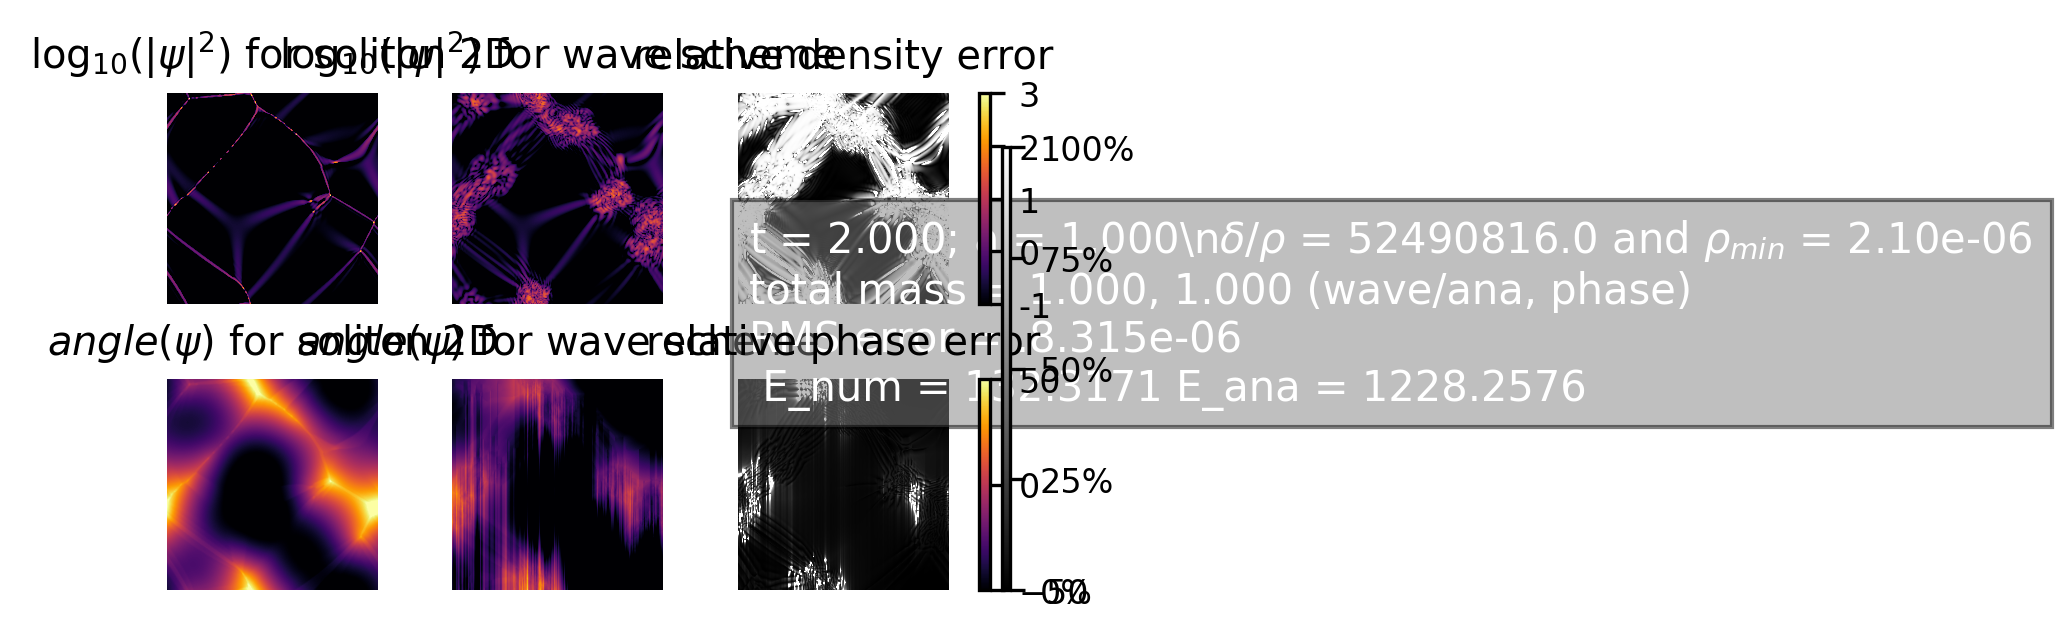

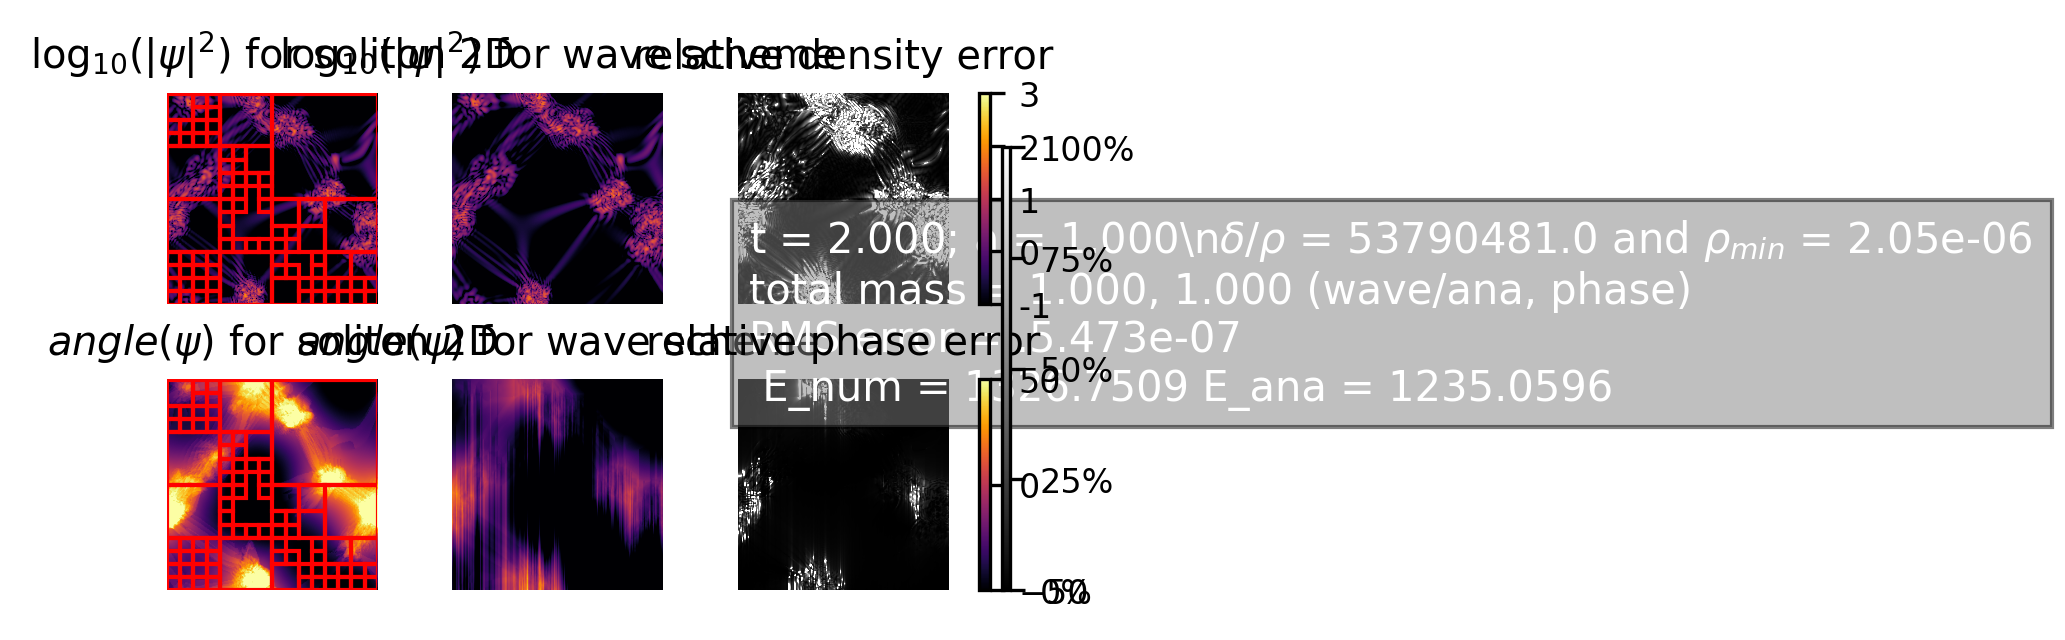

In [2]:
runTest(test_name="soliton 2D", scheme_name="phase-ho-upwind", useWaveSolver=True, createAnimation=True)
runTest(test_name="soliton 2D", scheme_name="hybrid",          useWaveSolver=True, createAnimation=True)

In [11]:
scheme_list.keys()

dict_keys(['wave - ftcs (forward in time, centered in space)', 'wave - crank-nicolson', 'wave - spectral', 'phase - upwind', 'phase - upwind with friction', 'phase - upwind without quantum pressure', 'phase - upwind without convection', 'phase - ho-upwind', 'phase - ho-upwind without diffusion', 'phase - ho-upwind without convection', 'phase - lw-upwind', 'phase - ftcs-convective', 'phase - ftcs-convective without diffusion', 'phase - ftcs-convective without convection', 'phase - ftcs-convective without source', 'fluid - muscl-hancock'])

In [10]:
test_list.keys()

dict_keys(['standing wave', 'harmonic oscillator eigenstate', 'harmonic oscillator coherent state', 'infinite well', 'gaussian wave packet', 'quasi-shock', 'wave packet collision', 'travelling wave packet', 'perturbation wave', 'soliton', 'expanding_soliton', 'perturbation wave 2D'])

In [3]:
runTest(test_name = "soliton 2D", scheme_name = "phase-ho-upwind", useWaveSolver=True, createAnimation=True)

# soliton 2D

## phase-ho-upwind

Constructing muscl-upwind scheme scheme
Setting up fourier grid
Constructing spectral scheme scheme
Setting up fourier grid
Number of frames: 150, time per frame (ms) = 10.0 and frames per second 20
Create animation with configuration:  {'dimension': 2, 'resolution': 128, 'domainSize': 10, 'usePeriodicBC': True, 'ghostBoundarySize': 3, 't0': 0, 'tEnd': 1.5, 'dt': 0.0001, 'slowDown': 5, 'fps': 20, 'useAdaptiveTimestep': True, 'cfl': 1, 'maximumNumberOfTimesteps': 100000, 'timeOrder': 2, 'stencilOrder': 4, 'fluxLimiter': 'VANALBADA', 'gravity': 1, 'useCosmology': False, 'nThreads': 4, 'externalPotential': None, 'debug': False, 'outputTimestep': False, 'useHybrid': False, 'useAdaptiveSubregions': False, 'subregions': [], 'windowUpdateFrequency': 100, 'WindowSize': 0.5, 'mode': 0, 'enoOrder': 1, 'rhoOrder': 1, 'modifiedPQN': 3, 'xlim': [0, 1], 'densityYlim': [0, 1], 'phaseYlim': [-50, 50], 'useAdaptiveYlim': False, 'plotDensityLogarithm': True, 'plotPhaseMod2': False, 'dpi': 300, 'figsize'

/media/xerox/INTENSO/fdm-hybrid-scheme/src/animation.py:512: UserWarning: Casting input data from float128 to float64 for imshow
  plt.savefig(f"plots/2d/{filename}.jpg")
/media/xerox/INTENSO/fdm-hybrid-scheme/src/animation.py:848: UserWarning: Casting input data from float128 to float64 for imshow
  plt.savefig(f"plots/{dim}d/{filename}/{i}.jpg", bbox_inches="tight", dpi=config["dpi"])
/media/xerox/INTENSO/fdm-hybrid-scheme/src/animation.py:863: UserWarning: Casting input data from float128 to float64 for imshow
  anim.save(f"gifs/{dim}d/{filename}.gif", writer=writergif)


: 

: 